In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(1)

In [69]:
#load data
data = pd.read_excel('Data\Molding_Data.xlsx') #using pandas to load the excel file
data = data.dropna(axis=0, how='any') #drop nan from the data

# prepare variables and target
X = data.loc[:,['T_Mold','T_Melt','P_Gate','P_Runner']] #Variables, or using data.iloc[:,2:6]
Y = data.loc[:,'Part thickness'] # Target
X = X.to_numpy() #conver data frame to numpy array
Y = Y.to_numpy()

# data normalization, normalization to [0 1] range
X_Norm = np.empty_like(X)
for i in range(X.shape[1]):
   data_ = X[:,i]
   X_Norm[:,i] = (data_-np.amin(data_))/(np.amax(data_)-np.amin(data_)) 
    
# normalize Y data
Y_Min = np.amin(Y)
Y_Max = np.amax(Y)
Y_Norm = (Y-Y_Min)/(Y_Max-Y_Min)

In [70]:
# split training and testing data

index = np.arange(len(Y_Norm))
np.random.shuffle(index) #disorder the original data

m = np.ceil(0.7*len(Y)) # 70% for training and 30% for testing
m = int(m) #covert float type to int type
X_Train = X_Norm[index[:m]]
Y_Train = Y_Norm[index[:m]]

X_Test = X_Norm[index[m:]]
Y_Test = Y_Norm[index[m:]]

In [71]:
# performance evaluation

def r2(y_predicted,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_predicted-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)

0.9477975408918157


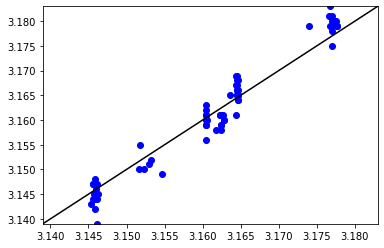

In [72]:
# Training with Sklearn.svm module

from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=0.1, gamma=10)
y_predict = svr_rbf.fit(X_Train, Y_Train).predict(X_Test)

y_predicted = y_predict*(Y_Max-Y_Min) +  Y_Min
Y_Test = Y_Test * (Y_Max-Y_Min) +  Y_Min

print(r2(y_predicted, Y_Test))
plt.scatter(y_predicted, Y_Test, c = 'b',marker = 'o')
plt.xlim(Y_Min, Y_Max)
plt.ylim(Y_Min, Y_Max)
plt.plot([Y_Min, Y_Max],[Y_Min, Y_Max],'k-')